In [1]:
!pip install pandas numpy scikit-learn seaborn

In [55]:
import pandas as pd
import numpy as np

In [75]:
df= pd.read_csv('/content/Share shipping  dataset.xlsx - shipping.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,44,1233
1,2,F,Flight,4,5,216,2,low,59,3088
2,3,A,Flight,2,2,183,4,low,48,3374
3,4,B,Flight,3,3,176,4,medium,10,1177
4,5,C,Flight,2,2,184,3,medium,46,2484
...,...,...,...,...,...,...,...,...,...,...
392,393,A,Road,4,4,178,4,medium,13,1614
393,394,B,Road,5,4,169,2,low,20,1765
394,395,C,Road,3,2,272,2,low,33,2321
395,396,F,Road,4,4,183,3,low,29,3251


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   397 non-null    int64 
 1   Warehouse_block      397 non-null    object
 2   Mode_of_Shipment     397 non-null    object
 3   Customer_care_calls  397 non-null    int64 
 4   Customer_rating      397 non-null    int64 
 5   Cost_of_the_Product  397 non-null    int64 
 6   Prior_purchases      397 non-null    int64 
 7   Product_importance   397 non-null    object
 8   Discount_offered     397 non-null    int64 
 9   Weight_in_gms        397 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 31.1+ KB


In [23]:
pip install tabulate

In [31]:
from tabulate import tabulate

In [32]:
column_names =df.columns.tolist()
column_names_table =[[i+1, name] for i, name in enumerate(column_names)]
print(tabulate(column_names_table, headers= ["index", "column name"]))

  index  column name
-------  -------------------
      1  ID
      2  Warehouse_block
      3  Mode_of_Shipment
      4  Customer_care_calls
      5  Customer_rating
      6  Cost_of_the_Product
      7  Prior_purchases
      8  Product_importance
      9  Discount_offered
     10  Weight_in_gms


In [13]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,199.000000,3.498741,3.098237,188.246851,3.118388,33.765743,2345.914358
std,114.748275,1.050793,1.424150,45.101675,1.055811,18.794154,1116.759140
min,1.000000,2.000000,1.000000,97.000000,2.000000,1.000000,1009.000000
25%,100.000000,3.000000,2.000000,150.000000,3.000000,18.000000,1511.000000
50%,199.000000,3.000000,3.000000,181.000000,3.000000,35.000000,2026.000000
75%,298.000000,4.000000,4.000000,225.000000,3.000000,50.000000,3054.000000
max,397.000000,7.000000,5.000000,294.000000,10.000000,65.000000,7846.000000


In [14]:
df.shape

(397, 10)

In [36]:
df.dtypes

,0
ID,int64
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Discount_offered,int64
Weight_in_gms,int64


In [15]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Discount_offered,0
Weight_in_gms,0


In [17]:
df.duplicated().sum()

0

In [20]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [39]:
Q1 =df['Customer_care_calls'].quantile(0.25)
Q3 =df['Customer_care_calls'].quantile(0.75)
IQR= Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [41]:
outliers =df[(df['Customer_care_calls']<lower_bound)|(df['Customer_care_calls']>upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
      ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
74    75               A             Ship                    6   
87    88               B             Ship                    6   
156  157               D             Ship                    6   
265  266               F             Road                    7   
364  365               C             Ship                    6   

     Customer_rating  Cost_of_the_Product  Prior_purchases Product_importance  \
74                 1                  238                6                low   
87                 2                  278                3             medium   
156                3                  275                5                low   
265                2                  203                5             medium   
364                2                  146                3                low   

     Discount_offered  Weight_in_gms  
74                 13           2442  
87                  3       

In [46]:
selected_columns =['ID', 'Warehouse_block', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms']
selected_columns

['ID',
 'Warehouse_block',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Discount_offered',
 'Weight_in_gms']

In [68]:
numeric_columns =['Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases']
numeric_columns

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases']

In [80]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors= "coerce")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,44,1233
1,2,F,Flight,4,5,216,2,low,59,3088
2,3,A,Flight,2,2,183,4,low,48,3374
3,4,B,Flight,3,3,176,4,medium,10,1177
4,5,C,Flight,2,2,184,3,medium,46,2484
...,...,...,...,...,...,...,...,...,...,...
392,393,A,Road,4,4,178,4,medium,13,1614
393,394,B,Road,5,4,169,2,low,20,1765
394,395,C,Road,3,2,272,2,low,33,2321
395,396,F,Road,4,4,183,3,low,29,3251


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

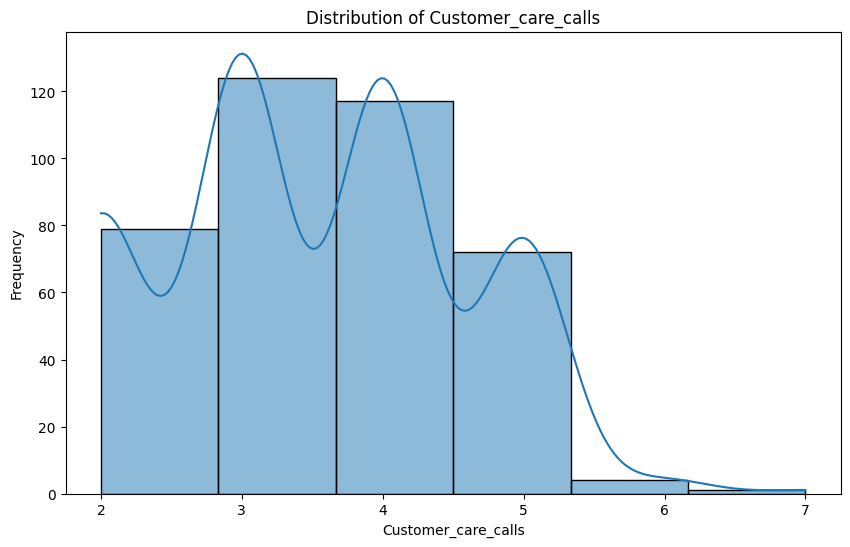

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_care_calls'], bins=6, kde=True)
plt.title('Distribution of Customer_care_calls')
plt.xlabel('Customer_care_calls')
plt.ylabel('Frequency')
plt.show()

<Axes: >

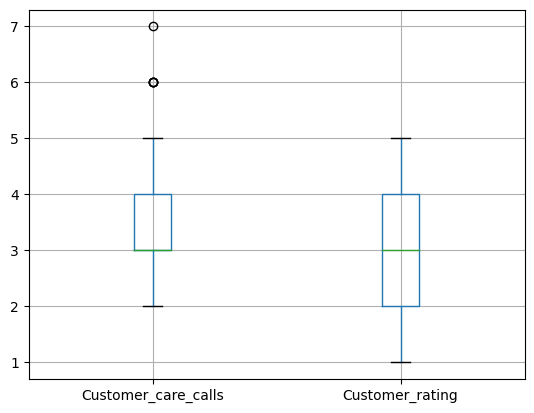

In [88]:
df.boxplot(column = ['Customer_care_calls',
 'Customer_rating'])


In [90]:
df[['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases']].corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases
Customer_care_calls,1.000000,-0.034510,0.247616,0.062729
Customer_rating,-0.034510,1.000000,-0.018188,-0.064855
Cost_of_the_Product,0.247616,-0.018188,1.000000,-0.013979
Prior_purchases,0.062729,-0.064855,-0.013979,1.000000


<Axes: >

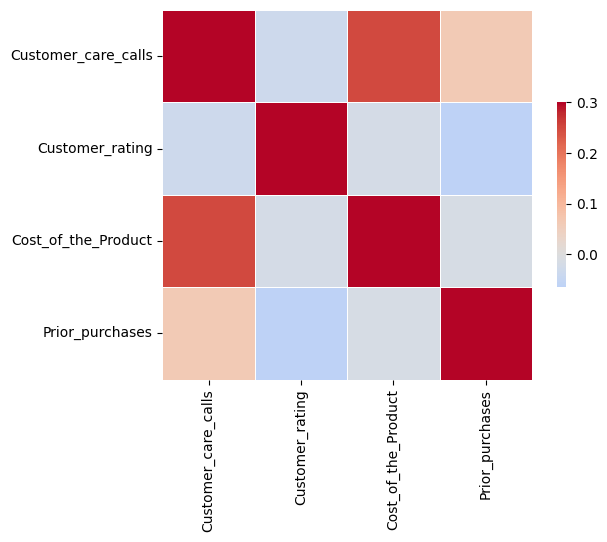

In [109]:
sns.heatmap(df[['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases']].corr(), vmax= .3, center=0, cmap='coolwarm', square=True, linewidths= .5, cbar_kws={"shrink": .5})

In [111]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [112]:
df_categorical =df[[ 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms']]

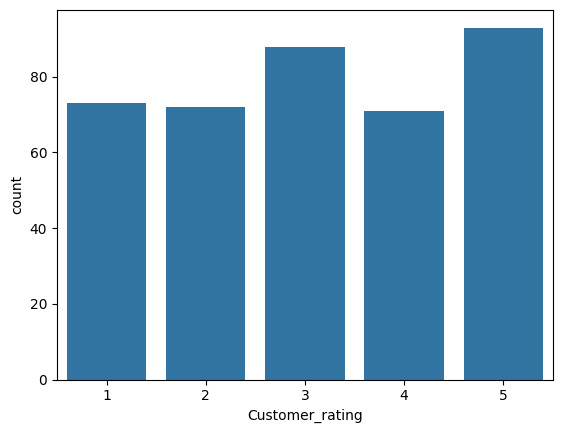

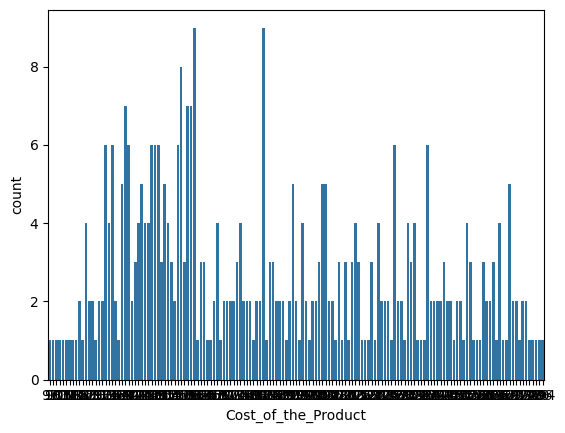

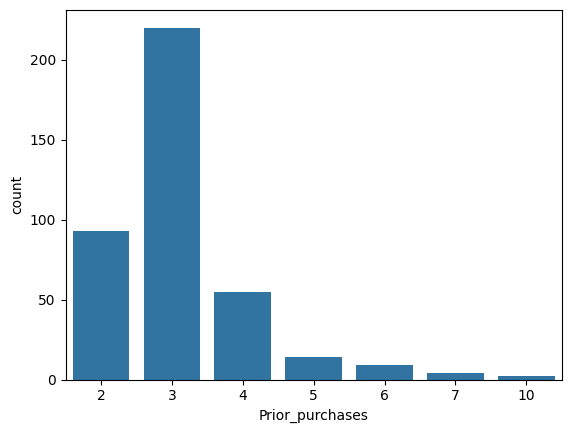

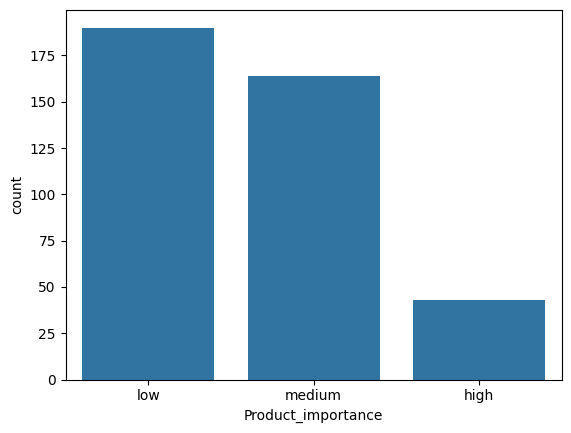

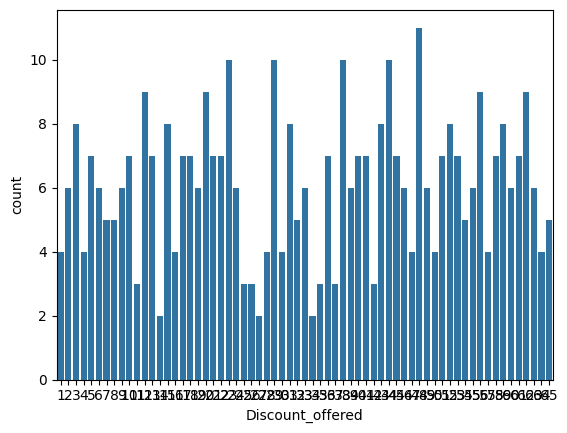

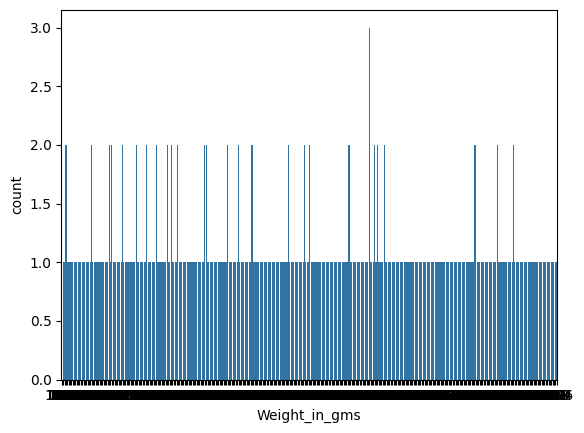

In [125]:
for i in df_categorical:
  cat_num =df_categorical[i].value_counts()
  sns.barplot(x= cat_num.index, y=cat_num)
  plt.show()

In [168]:
import statsmodels.api as sm
import numpy as np

In [170]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [182]:
X_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
17,18,F,Ship,5,227,3,medium,36,3952
168,169,D,Ship,2,250,3,low,53,2478
24,25,D,Ship,5,251,2,medium,28,3561
126,127,D,Road,5,220,3,medium,40,3516
395,396,F,Road,4,183,3,low,29,3251
...,...,...,...,...,...,...,...,...,...
71,72,F,Ship,5,230,2,low,2,2229
106,107,C,Ship,1,238,3,low,17,2624
270,271,D,Flight,2,209,5,medium,12,3054
348,349,D,Ship,5,233,4,low,44,2551


In [183]:
X_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
114,115,D,Road,5,168,2,high,50,1616
278,279,A,Flight,3,171,3,low,24,1304
237,238,B,Ship,2,133,3,low,5,1268
57,58,B,Ship,3,193,3,medium,29,3453
72,73,D,Ship,5,232,3,medium,33,2998
...,...,...,...,...,...,...,...,...,...
283,284,F,Flight,4,165,3,low,20,1150
375,376,B,Ship,5,262,2,low,53,3275
253,254,F,Road,5,160,3,low,19,1399
331,332,F,Ship,3,140,3,high,46,1072


In [184]:
Y_train

,Customer_care_calls
17,5
168,4
24,4
126,4
395,4
...,...
71,5
106,3
270,3
348,4


In [186]:
Y_test

,Customer_care_calls
114,3
278,4
237,2
57,3
72,5
...,...
283,5
375,3
253,2
331,4
